<a href="https://colab.research.google.com/github/syilmazs/MachineLearning/blob/main/Cluestering_Analysis_Customers_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib.pyplot import matplotlib
plt.rcParams["figure.figsize"] = (10,6)

#### Load Dataset

In [2]:
df =pd.read_csv("/content/Mall_Customers.csv")

#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.Gender =df.Gender.map({"Male":1, "Female":0})

In [6]:
df.rename(columns={"Annual Income (k$)": "Income","Spending Score (1-100)": "Score"}, inplace=True)

In [7]:
df.Gender.value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [9]:
df.Score.value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Score, Length: 84, dtype: int64

In [10]:
df.drop(columns="CustomerID", axis=1, inplace=True)

In [11]:
df.sample()

,Gender,Age,Income,Score
91,1,18,59,41


In [13]:
df.Income.value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Income, Length: 64, dtype: int64

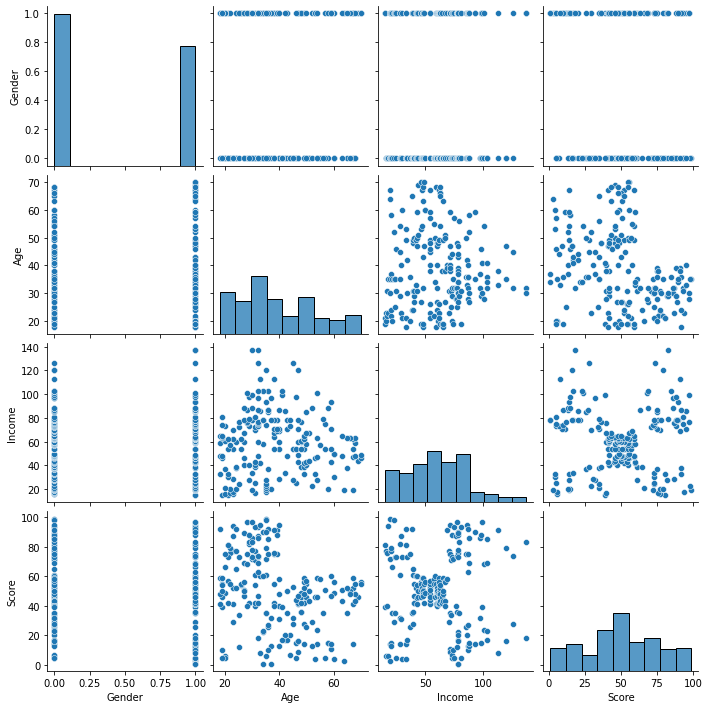

In [14]:
sns.pairplot(df)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [15]:
df.describe()

,Gender,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [16]:
df.corr()

,Gender,Age,Income,Score
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Income,0.056410,-0.012398,1.000000,0.009903
Score,-0.058109,-0.327227,0.009903,1.000000


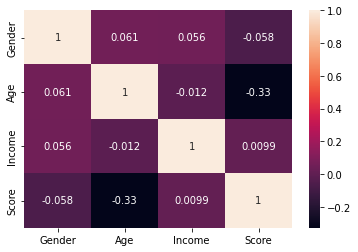

In [17]:
sns.heatmap(df.corr(), annot=True)

In [18]:
df.sample(5)

,Gender,Age,Income,Score
30,1,60,30,4
153,0,38,78,76
71,0,47,49,42
181,0,32,97,86
12,0,58,20,15


AttributeError: ignored

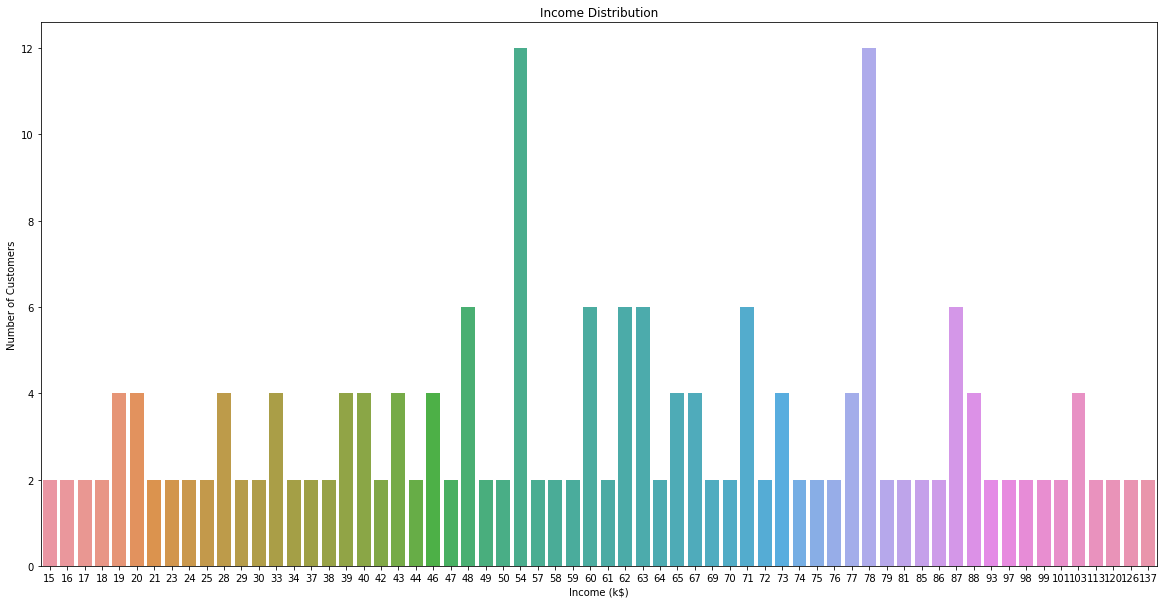

In [26]:
plt.figure(figsize= (20,10))
ax = sns.countplot(x='Income', data=df)
plt.title("Income Distribution")
plt.xlabel('Income (k$)')
plt.ylabel('Number of Customers')
ax.bar_label(ax.containers[0]);


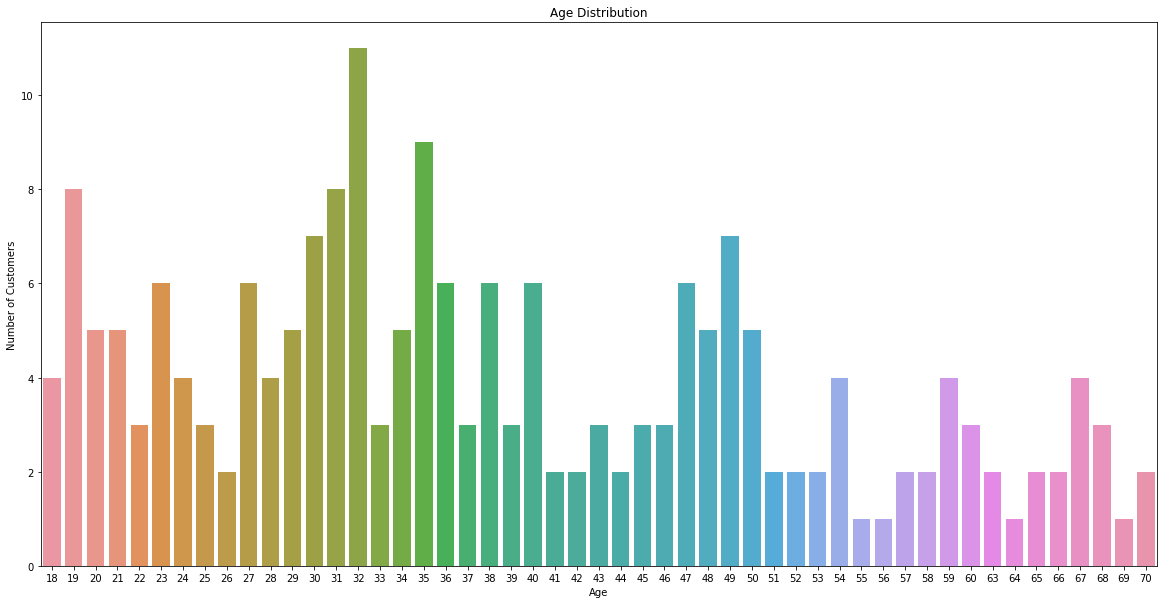

In [27]:
plt.figure(figsize= (20,10))
ax = sns.countplot(x='Age', data=df)
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Number of Customers');


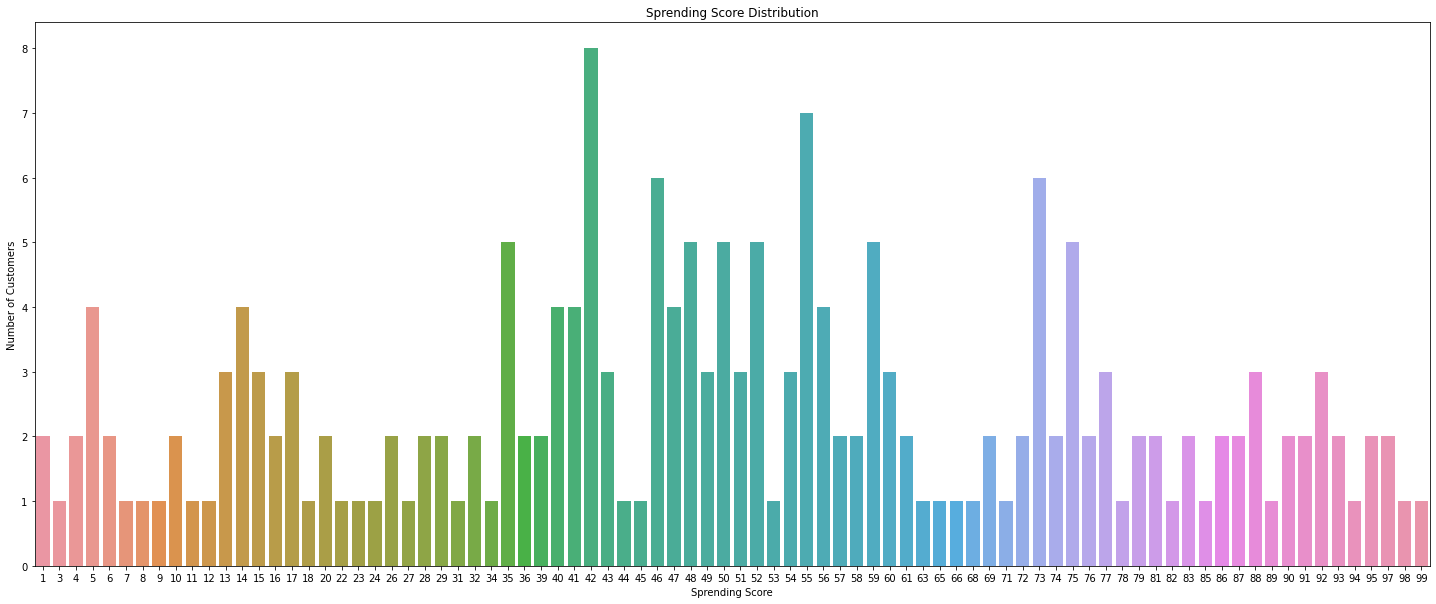

In [31]:
plt.figure(figsize= (25,10))
ax = sns.countplot(x='Score', data=df)
plt.title("Sprending Score Distribution")
plt.xlabel('Sprending Score')
plt.ylabel('Number of Customers');

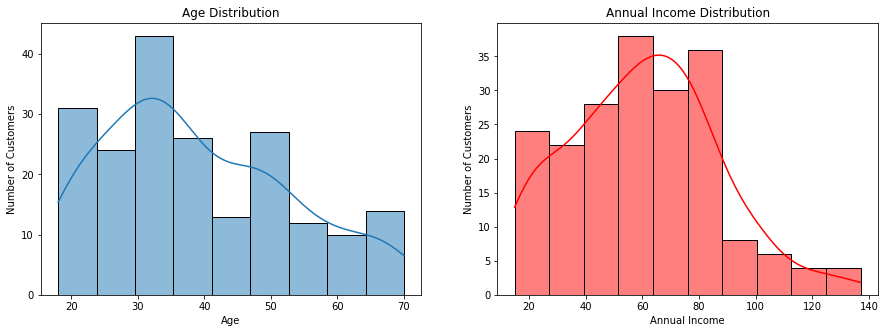

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers');
# ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = sns.histplot(x ='Income', data=df, color='red', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers');
# ax.bar_label(ax.containers[0]);



(-1.25, 1.25, -1.25, 1.25)

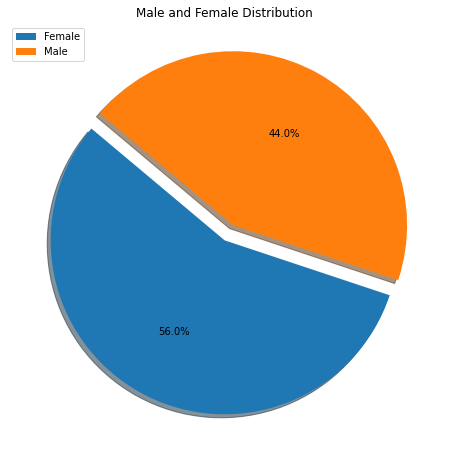

In [40]:
plt.figure(figsize=(8,8))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

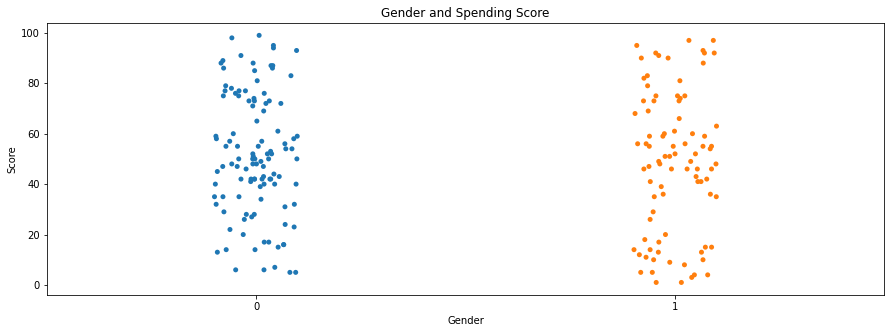

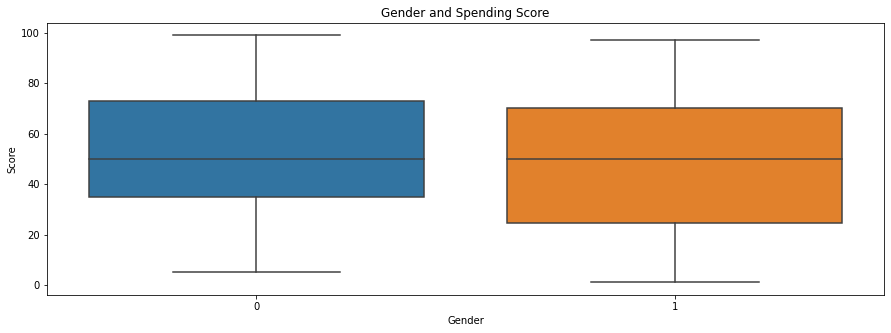

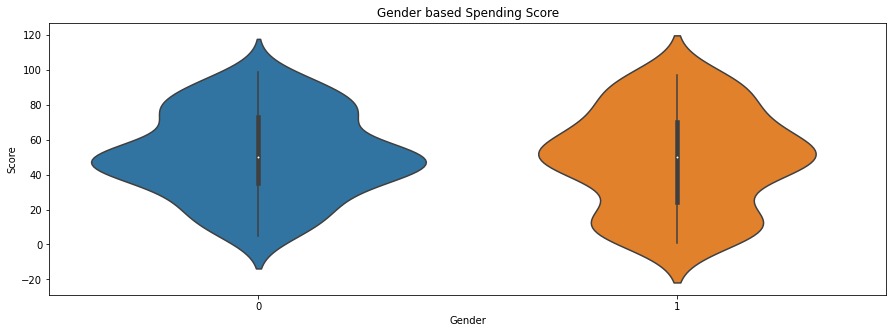

In [41]:
plt.figure(figsize=(15,5))
sns.stripplot(x='Gender', y='Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender', y='Score', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='Gender', y='Score', data=df)
plt.title('Gender based Spending Score')
plt.show()

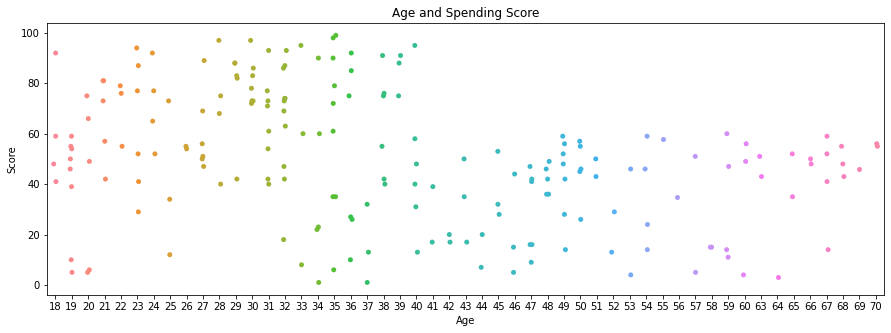

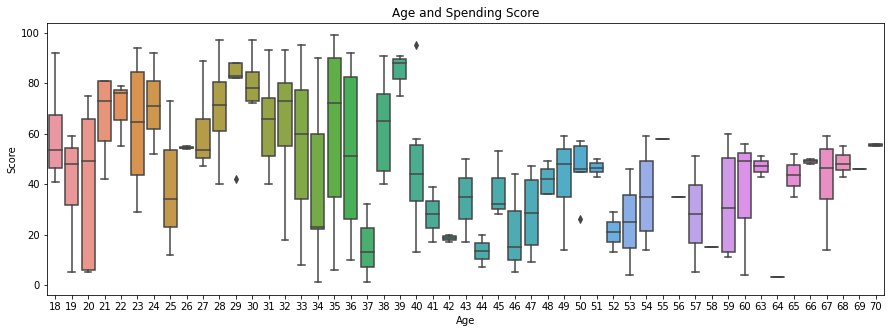

In [43]:
plt.figure(figsize=(15,5))
sns.stripplot(x='Age', y='Score', data=df)
plt.title('Age and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Age', y='Score', data=df)
plt.title('Age and Spending Score')
plt.show()


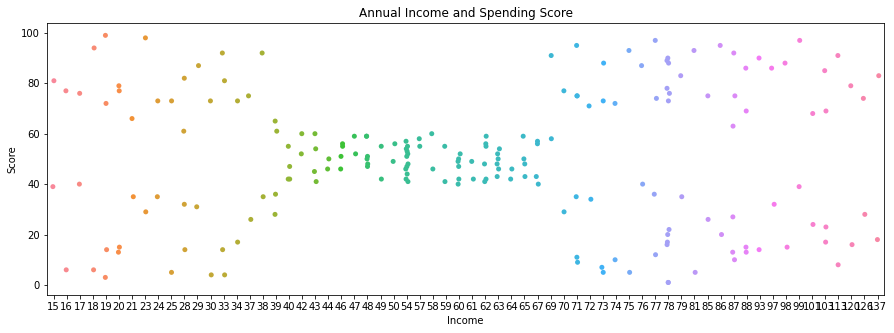

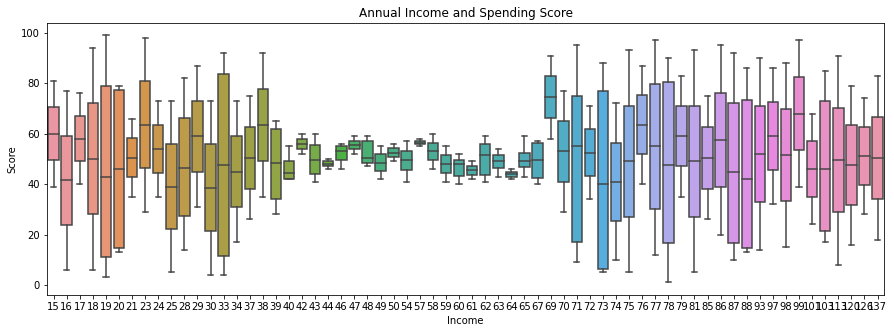

In [45]:
plt.figure(figsize=(15,5))
sns.stripplot(x='Income', y='Score', data=df)
plt.title('Annual Income and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Income', y='Score', data=df)
plt.title('Annual Income and Spending Score')
plt.show()


---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [48]:
X1 = df[['Age', 'Score']]
X1.head()

,Age,Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [52]:
X1_scale = scaler.fit(X1)

In [53]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)

In [55]:
K_means_model.fit_predict(X1)

array([3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 3,
       3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 3, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2,
       4, 2], dtype=int32)

In [56]:
K_means_model.fit(X1)

KMeans(n_clusters=5, random_state=42)

In [57]:
K_means_model.labels_

array([3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 3,
       3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 3, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2,
       4, 2], dtype=int32)

In [58]:
X1["Classes1"] = K_means_model.labels_
X1

,Age,Score,Classes1
0,19,39,3
1,21,81,2
2,20,6,4
3,23,77,2
4,31,40,1
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,4


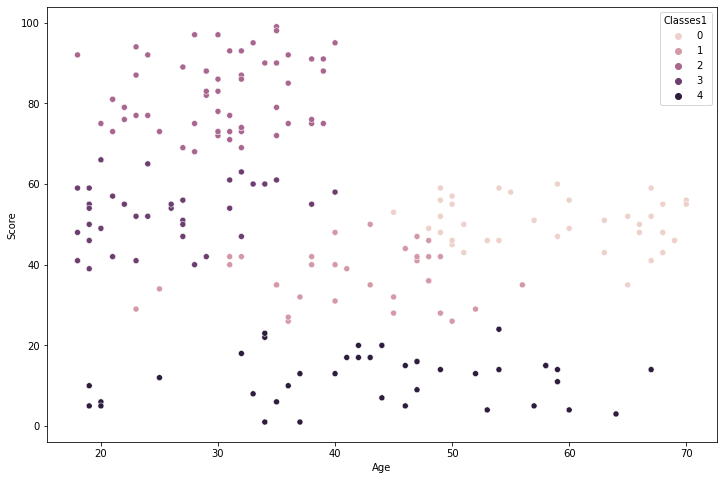

In [61]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=X1, x="Age", y="Score", hue="Classes1")

In [62]:
X1 = X1.drop("Classes1", axis =1)

In [63]:
!pip install pyclustertend

In [64]:
from pyclustertend import hopkins

In [65]:
X1.shape

(200, 2)

In [67]:
hopkins(X1, X1.shape[0])

0.30574203432719543

#### *ii. Determine optimal number of clusters*

In [69]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

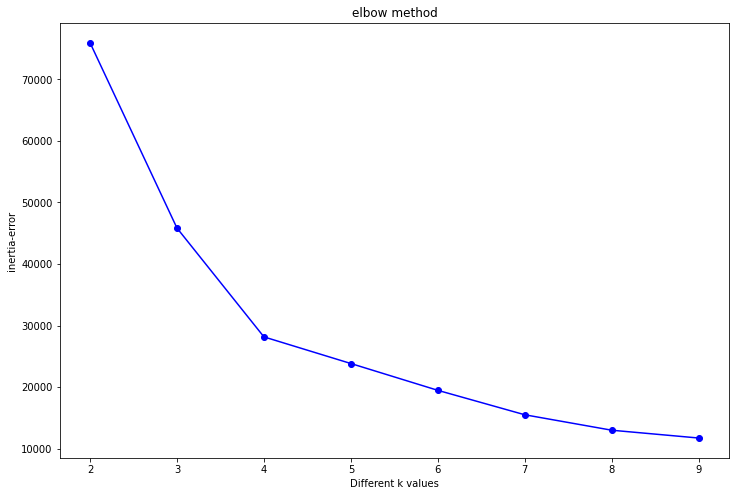

In [71]:
plt.figure(figsize=(12,8))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [72]:
ssd

[75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23838.248821646186,
 19483.1179104427,
 15514.19313435103,
 13006.483628851018,
 11738.02029695451]

In [73]:
pd.Series(ssd).diff()

0             NaN
1   -30108.479394
2   -17675.093049
3    -4327.334745
4    -4355.130911
5    -3968.924776
6    -2507.709506
7    -1268.463332
dtype: float64

In [74]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,30108.479394
3,17675.093049
4,4327.334745
5,4355.130911
6,3968.924776
7,2507.709506
8,1268.463332


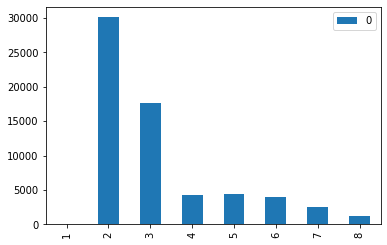

In [79]:
df_diff.plot(kind='bar')

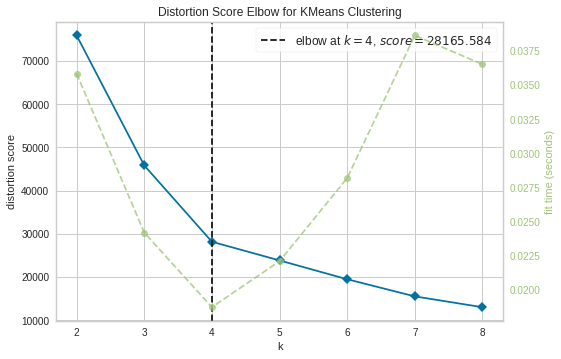

In [81]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X1)        # Fitting the data to the visualizer
visualizer.show();

In [84]:
from sklearn.metrics import silhouette_score

In [85]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


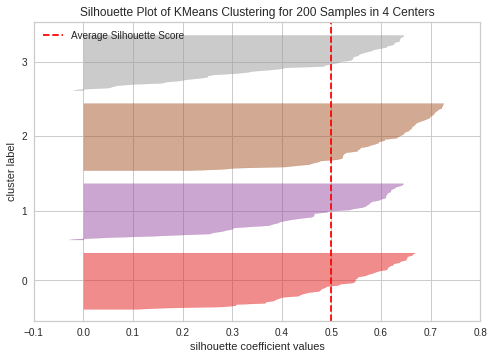

In [86]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X1)    # Fitting the data to the visualizer
visualizer.poof();

### Why silhouette_score is negative?

In [87]:
from sklearn.metrics import silhouette_score

In [88]:
silhouette_score(X1, K_means_model.labels_)

0.43350225495428363

#### *iii. Apply K Means*

In [89]:
model = KMeans(n_clusters =4, random_state=42)
model.fit_predict(X1)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [90]:
model.labels_

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [91]:
clusters = model.labels_

In [93]:
X1["predicted_clusters"] = clusters

In [95]:
X1.sample(10)

,Age,Score,predicted_clusters
90,68,55,0
144,25,12,1
168,36,27,1
183,29,88,2
158,34,1,1
73,60,56,0
83,46,44,0
156,37,1,1
64,63,51,0
142,28,40,3


#### *iv. Visualizing and Labeling All the Clusters*

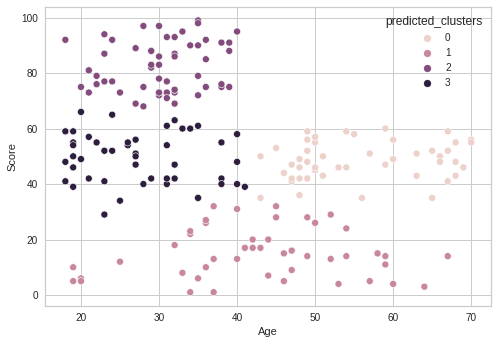

In [97]:
sns.scatterplot(data=X1, x="Age", y="Score", hue="predicted_clusters")

In [ ]:
X1_labels = X1["predicted_clusters"].map({"elder_middle_income":0, "lower_income":1,"upper_income":2, "young_middle_income":3})

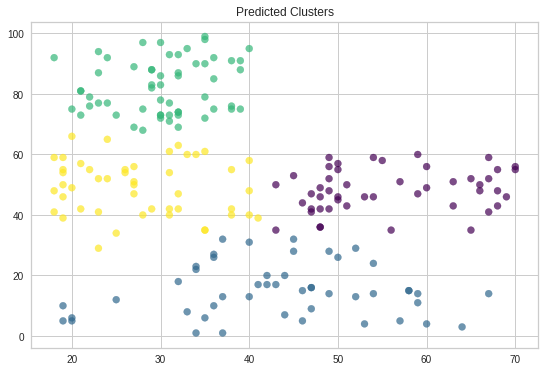

In [104]:
plt.figure(figsize = (20,6))


plt.subplot(122)
plt.scatter(X1["Age"], X1["Score"], c = X1.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.title("Predicted Clusters");

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [ ]:
df.sample()

,Gender,Age,income,score
65,1,18,48,59


In [105]:
X2 = df[["Income", "Score"]]
X2

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### *ii. Determine optimal number of clusters*

In [106]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X2)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

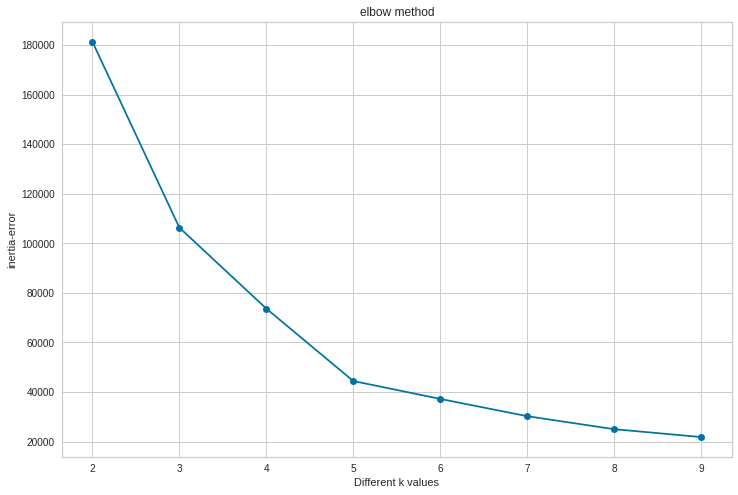

In [107]:
plt.figure(figsize=(12,8))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [108]:
ssd

[181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21850.165282585636]

In [109]:
pd.Series(ssd).diff()

0             NaN
1   -75015.222897
2   -32668.584023
3   -29231.333592
4    -7214.640937
5    -6974.157303
6    -5247.817858
7    -3161.674067
dtype: float64

In [110]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,75015.222897
3,32668.584023
4,29231.333592
5,7214.640937
6,6974.157303
7,5247.817858
8,3161.674067


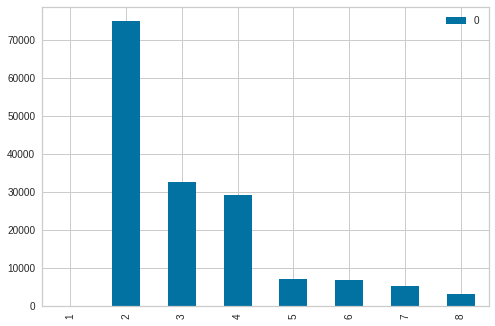

In [111]:
df_diff.plot(kind="bar")

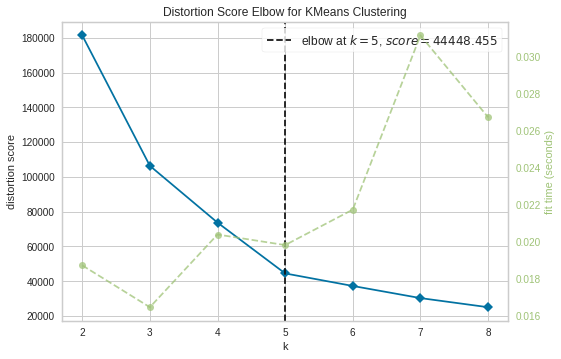

In [112]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fitting the data to the visualizer
visualizer.show();

In [113]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


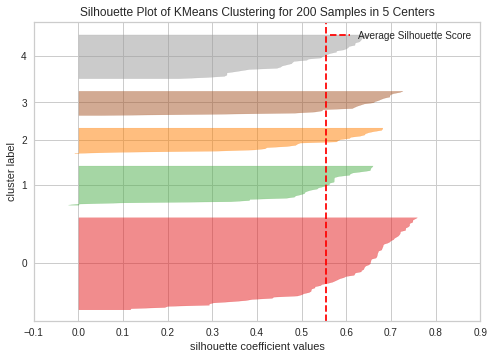

In [115]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X2)    # Fitting the data to the visualizer
visualizer.poof();

In [120]:
silhouette_score(X2, kmeans.labels_)

0.45827056882053113

#### *iii. Apply K Means*

In [123]:
kmeans2 = KMeans(n_clusters = 5, random_state=42)
kmeans2.fit_predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [124]:
X2['cluster_Kmeans'] = kmeans2.fit_predict(X2) #kmeans2.labels_
X2

,Income,Score,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

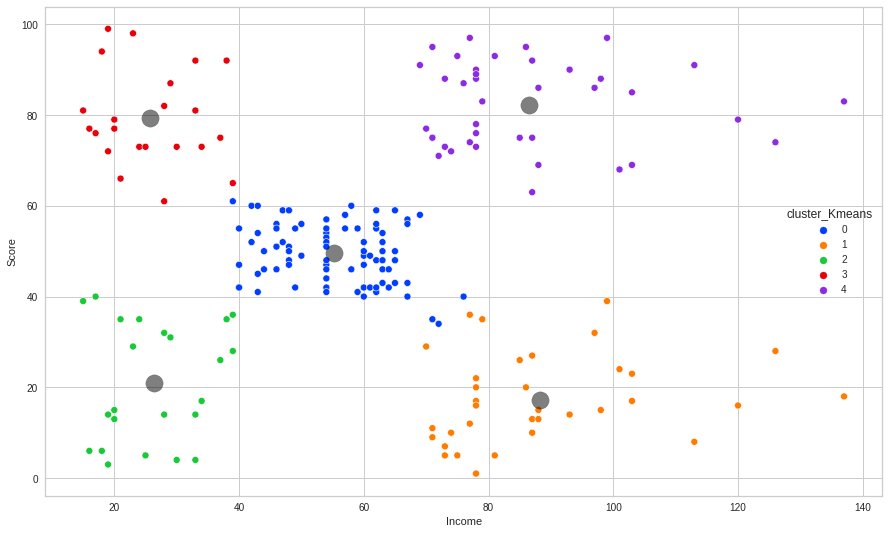

In [125]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Income', y='Score', hue='cluster_Kmeans', data=X2, palette="bright")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [126]:
from scipy.cluster.hierarchy import linkage

In [127]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

In [128]:
from scipy.cluster.hierarchy import dendrogram

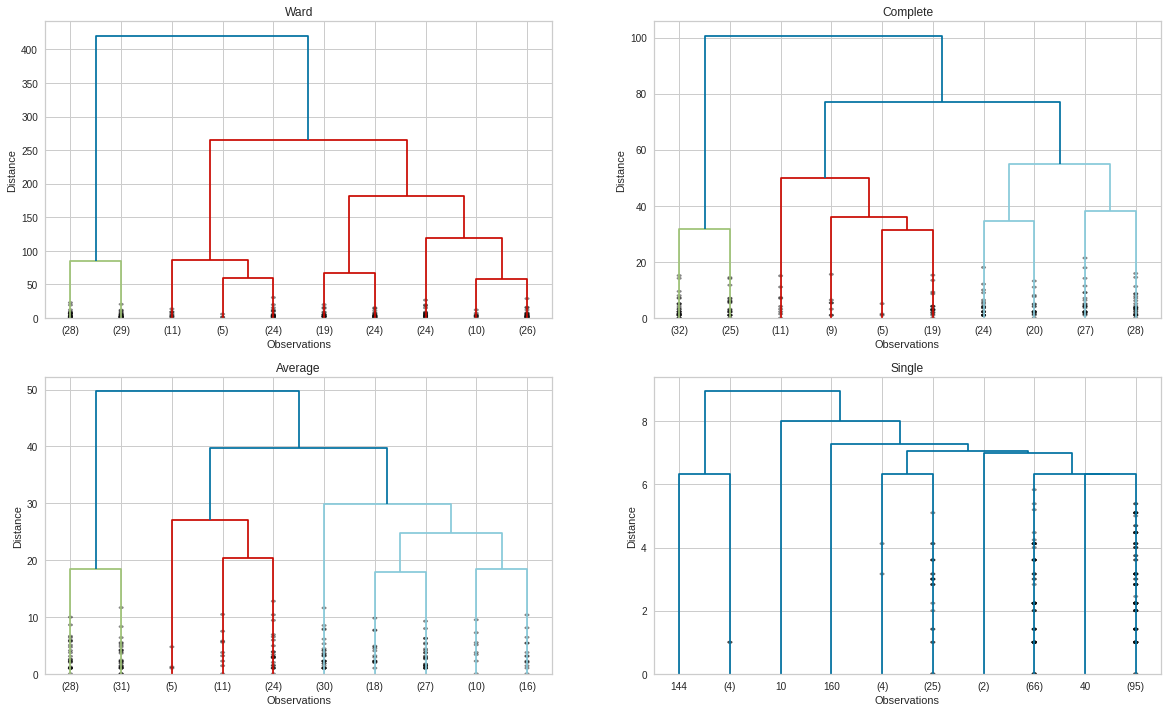

In [129]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

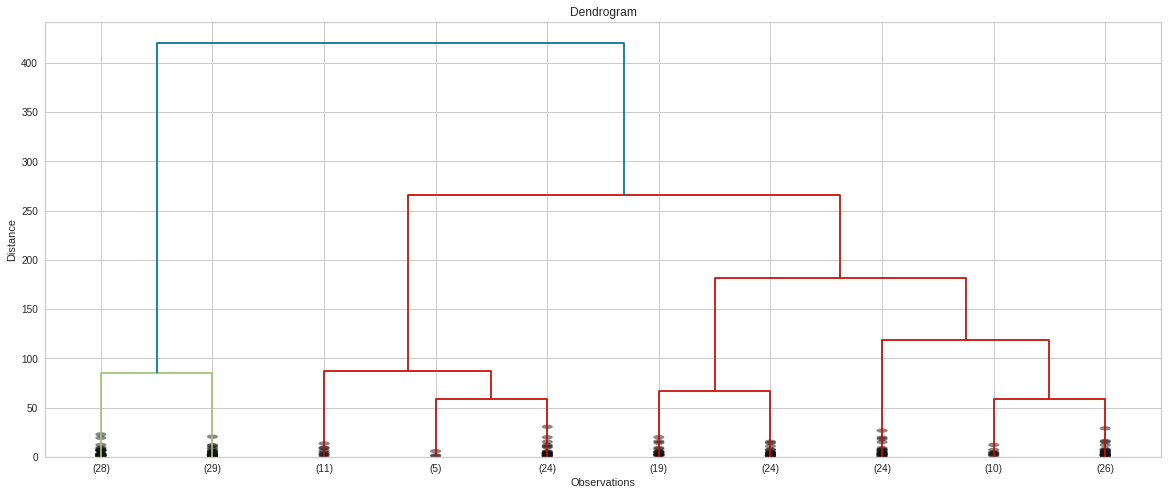

In [130]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [131]:
from sklearn.cluster import AgglomerativeClustering

In [132]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4535015472745782
For n_clusters=3, the silhouette score is 0.4406885284501858
For n_clusters=4, the silhouette score is 0.47016292560412337
For n_clusters=5, the silhouette score is 0.42054093495342704
For n_clusters=6, the silhouette score is 0.4226811987396673
For n_clusters=7, the silhouette score is 0.39112112744909255
For n_clusters=8, the silhouette score is 0.3758221398607297
For n_clusters=9, the silhouette score is 0.38230312834954816
For n_clusters=10, the silhouette score is 0.3881905779021524


## Clustering based on Annual Income and Spending Score- x2

In [133]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

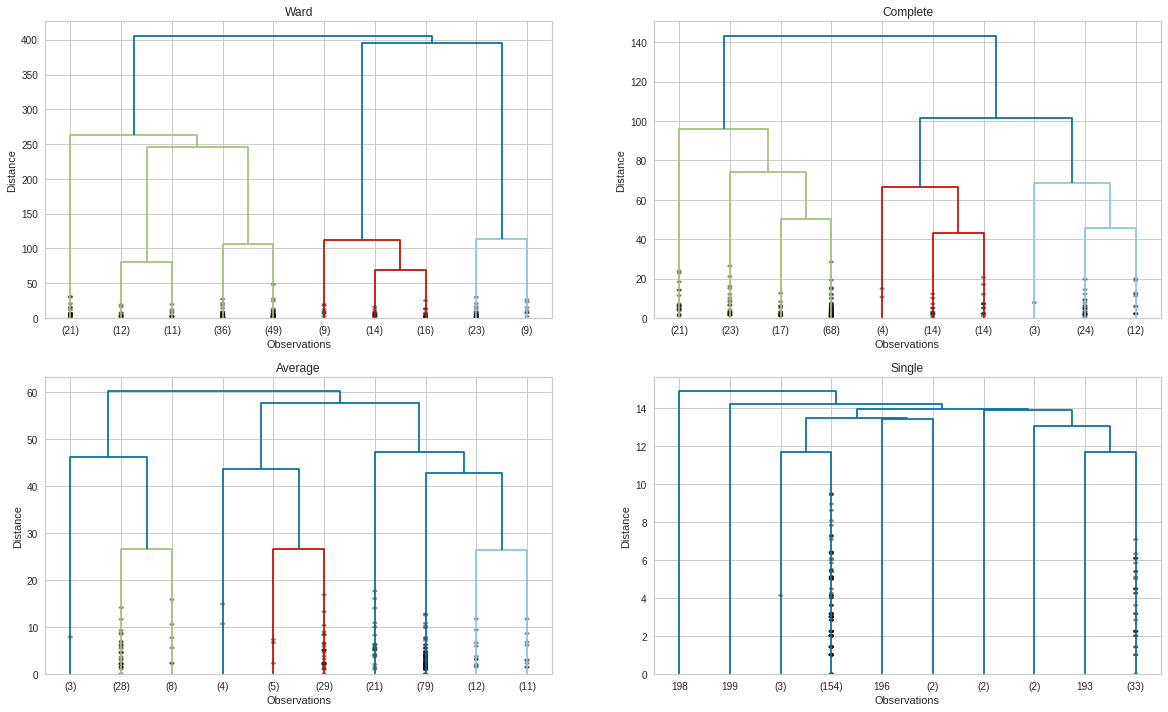

In [134]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

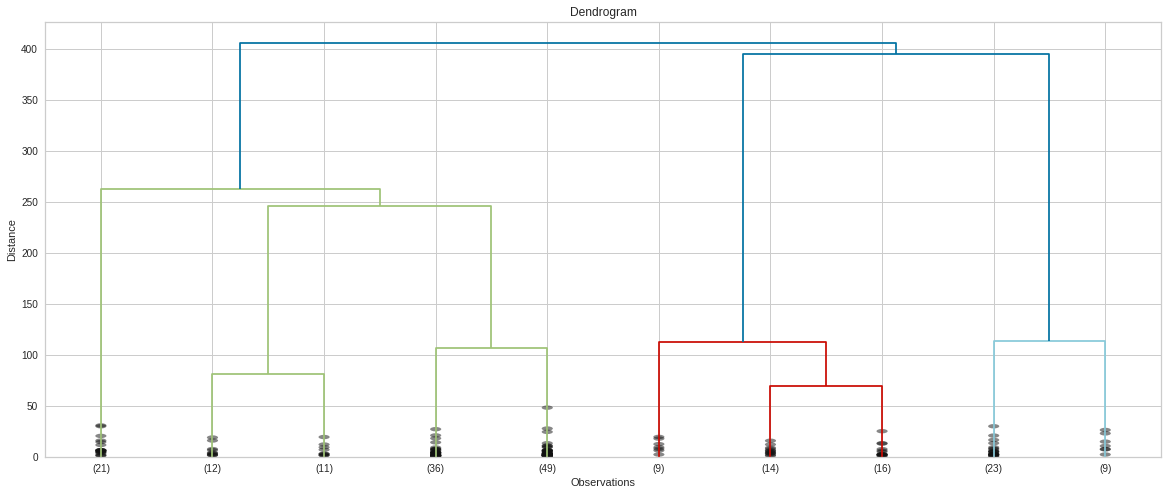

In [135]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [136]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36737734620684265
For n_clusters=3, the silhouette score is 0.462308734038414
For n_clusters=4, the silhouette score is 0.4924899099064366
For n_clusters=5, the silhouette score is 0.5541332798644271
For n_clusters=6, the silhouette score is 0.5390996397382017
For n_clusters=7, the silhouette score is 0.520894822141792
For n_clusters=8, the silhouette score is 0.43313054817610713
For n_clusters=9, the silhouette score is 0.43944465774630276
For n_clusters=10, the silhouette score is 0.4345958236001419


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [137]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(X1)

In [138]:
X1['cluster_Agg'] = y_agg
X1.head()

,Age,Score,predicted_clusters,Classes1,cluster_Agg
0,19,39,3,3,0
1,21,81,2,2,1
2,20,6,1,4,2
3,23,77,2,2,1
4,31,40,3,1,0


In [139]:
X1.drop(columns="Classes1", axis =1, inplace = True)

In [141]:
X1.rename(columns= {"predicted_clusters": "cluster_Kmeans"}, inplace=True)

In [142]:
X1.head()

,Age,Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,1
2,20,6,1,2
3,23,77,2,1
4,31,40,3,0


#### Annual Income and Spending Score- x2

In [143]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(X2)

In [144]:
X2['cluster_Agg'] = y_agg2
X2.head()

,Income,Score,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

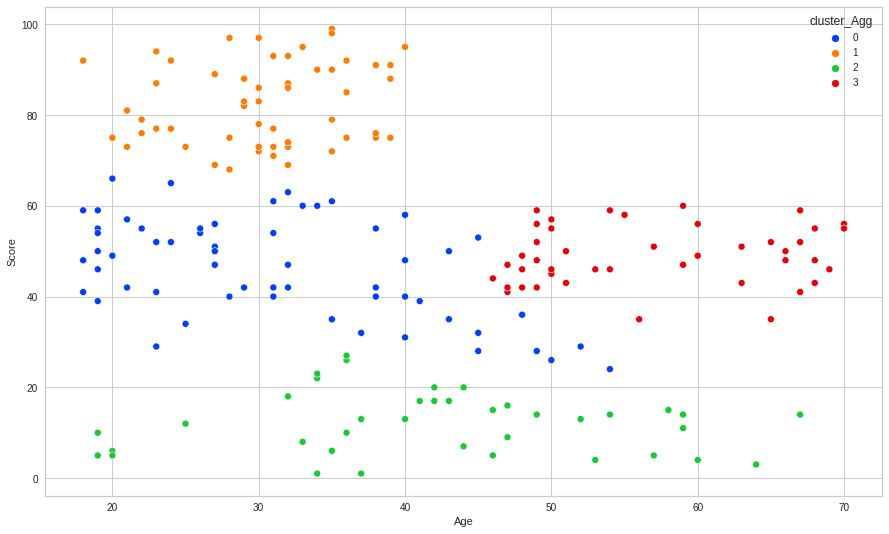

In [145]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Score', hue='cluster_Agg', data=X1, palette="bright")

Text(0.5, 1.0, 'Agg')

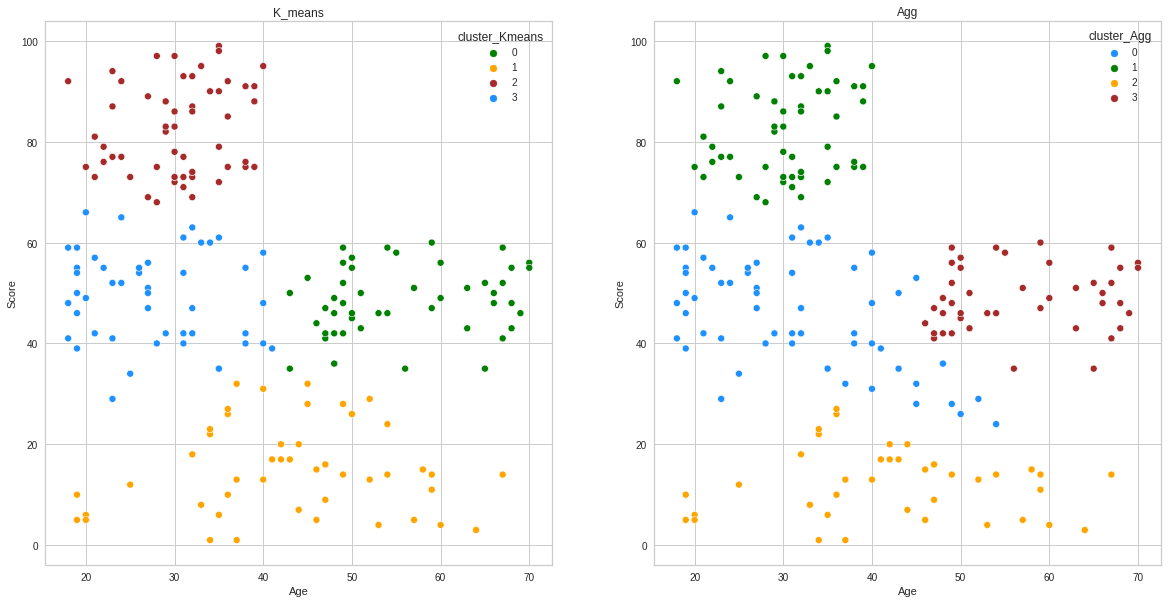

In [147]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='Age', y='Score', hue='cluster_Kmeans', data=X1, palette=['green','orange','brown',
                                                                             'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age', y='Score', hue='cluster_Agg', data=X1, palette=['dodgerblue','green',
                                                                              'orange','brown'])
plt.title("Agg")

#### Annual Income and Spending Score- x2

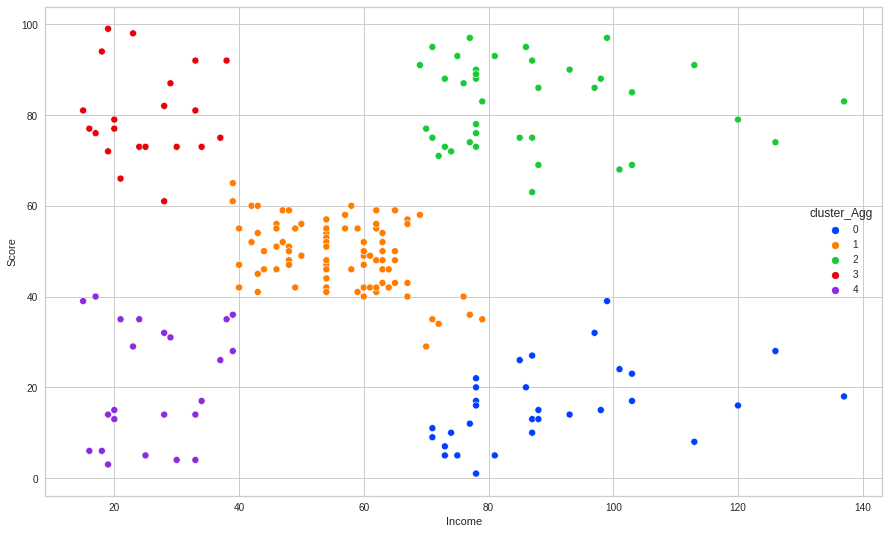

In [148]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Income', y='Score', hue='cluster_Agg', data=X2 ,palette="bright")

Text(0.5, 1.0, 'Agg')

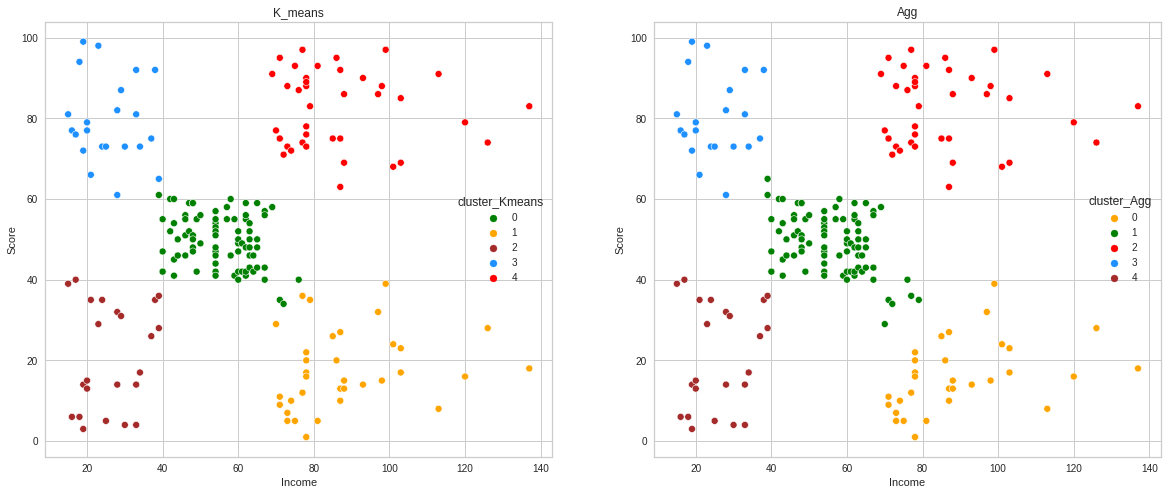

In [149]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Income', y='Score', hue='cluster_Kmeans', data=X2, palette=['green', 'orange',
                                                            'brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Income', y='Score', hue='cluster_Agg', data=X2, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.title("Agg")

#### Interpretation based on Age and Spending Score- x1

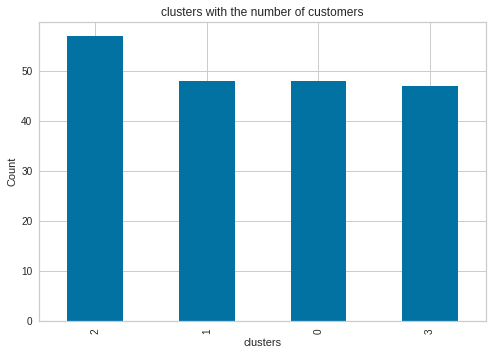

In [151]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X1.cluster_Kmeans.value_counts().plot(kind='bar')
#ax.bar_label(ax.containers[0]);

In [152]:
df["Kmeans_cluster_Age_Spending_Score"] = X1.cluster_Kmeans
df.head()

,Gender,Age,Income,Score,Kmeans_cluster_Age_Spending_Score
0,1,19,15,39,3
1,1,21,15,81,2
2,0,20,16,6,1
3,0,23,16,77,2
4,0,31,17,40,3


In [154]:
df.Gender =df.Gender.map({1:"Male", 0: "Female"})

In [155]:
df.head()

,Gender,Age,Income,Score,Kmeans_cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


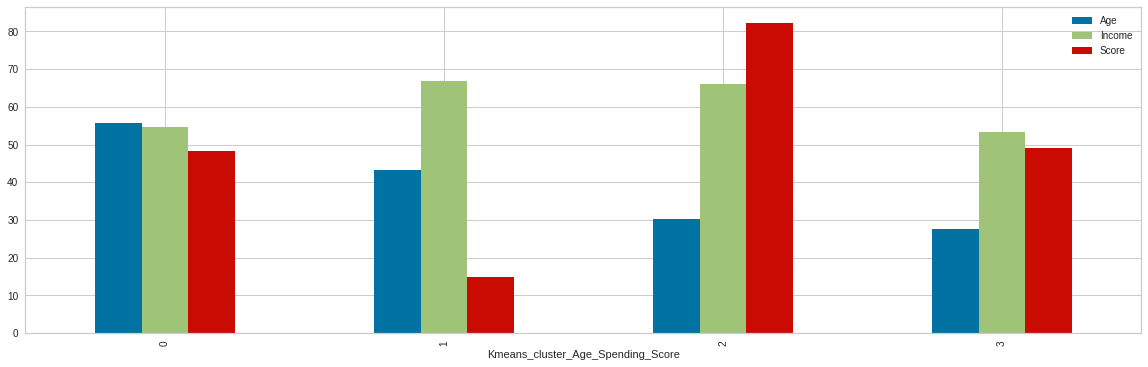

In [157]:
ax = df.groupby("Kmeans_cluster_Age_Spending_Score").mean().plot(kind='bar', figsize = (20,6))

### Conclusion

**cluster 0** : The average age is around 55, both income level and spending scores are on average. 
It should be researched what can be done to increase spending score of these customers.

**cluster 1**: The average age is around 45, the income level is high but the spending scores are very low. 
This group is our target customers and specific strategies should be developed to increase spendings of these customers.

**cluster 2** :The average age is around 30. The income level is high and spending scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Customer loyalty programmes should be considered in order to keep these customers.    
    
**cluster 3**: The average age is around 25.both annual income and spending scores are on average. These young customers have relatively high spending scores than elder customers. 

#### Interpretation based on Annual Income and Spending Score- x2

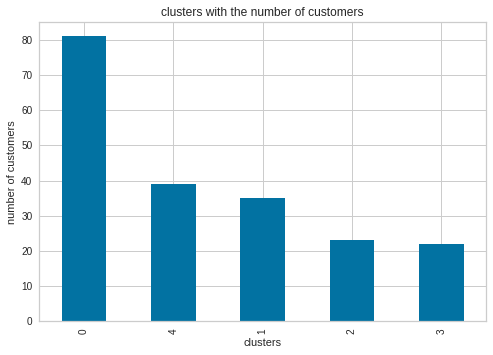

In [159]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("number of customers")
ax = X2.cluster_Kmeans.value_counts().plot(kind='bar')
#ax.bar_label(ax.containers[0]);

In [160]:
df.head()

,Gender,Age,Income,Score,Kmeans_cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


In [162]:
df.drop(columns= "Kmeans_cluster_Age_Spending_Score", inplace=True)

In [163]:
df["cluster_Annual_Income_Spending_Score"] = X2.cluster_Kmeans
df.head()

,Gender,Age,Income,Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


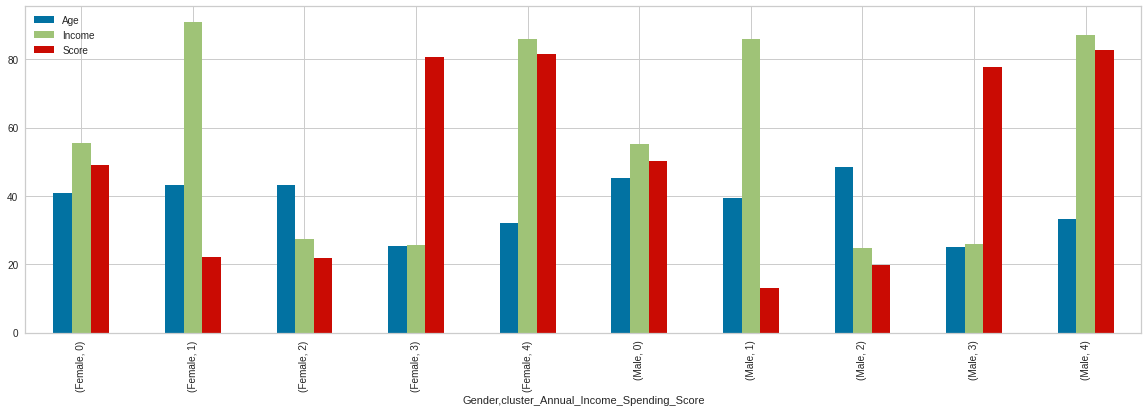

In [164]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20,6))

## Conclusion

### Female

**cluster 0** : The average age is around 40, both income and spending scores are on average. 
It should be researched what can be done to increase spending score of these customers.

**cluster 1**: The average age is around 45, the income is very high but the spending scores is low.
This group is our target customers and specific strategies should be developed to increase spendings of these customers. 

**cluster 2** :The average age is around 45. Both income and spending scores are low. Promotions or discount coupons maybe usefull to increase the spendings of these customers.

**cluster 3**: The average age is around 25. Low annual incomes but very high spending scores. 

**cluster 4**: The average age is around 30, the annual income and the spending score
are very high. This group consists of our loyal customers. Our company derives the main profit from this group. Customer loyalty programmes should be considered in order to keep these customers.    

### Male

**cluster 0** : The average age is around 45, both annual income and spending scores are on average. 
It should be researched what can be done to increase spending score of these customers.

**cluster 1**: The average age is around 40, the annual income is very high but the spending score is very low.
This group is our target customers and specific strategies should be developed to increase spendings of these customers.    

**cluster 2** :The average age is around 50. Both annual income and spending scores are low. 

**cluster 3**: The average age is around 25. Low annual incomes but very high spending scores. 

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Customer loyalty programmes should be considered in order to keep these customers.  

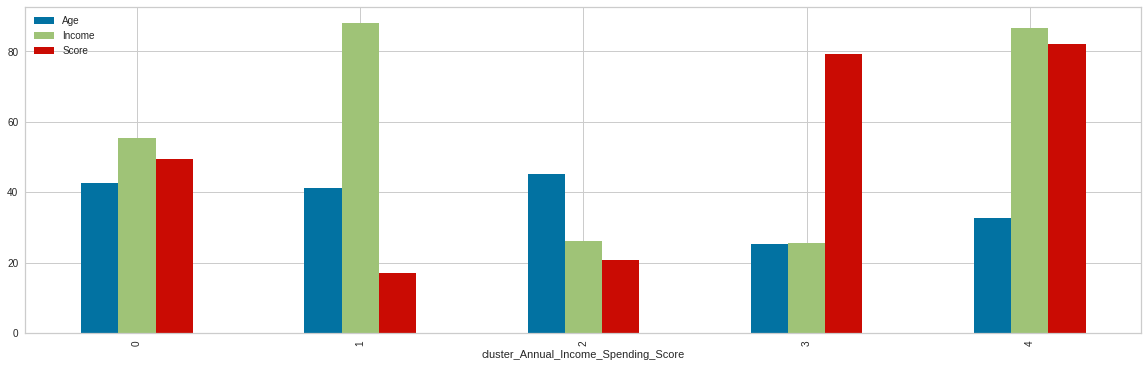

In [165]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))

**cluster 0** : The average age is around 40, both annual income and spending scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, annual income level is very high but the spending score is very low. 
This group is our target customers and specific strategies should be developed to increase spendings of these customers.    

**cluster 2** :The average age is around 45. Both annual income and spending scores are low. 

**cluster 3**: The average age is around 25. Low annual incomes but very high spending scores. 

**cluster 4**: The average age is around 30, the annual income and the spending score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Customer loyalty programmes should be considered in order to keep these customers.  

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___